In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [2]:
# Set parameters
batch_size = 32
img_height = 150
img_width = 150

In [3]:
# Dataset directory (adjust based on your environment)
data_dir = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'

In [4]:
# Loading the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    validation_split=0.1,
    subset='training',
    seed=123,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    validation_split=0.1,
    subset='validation',
    seed=123,
    batch_size=batch_size
)

Found 12446 files belonging to 4 classes.
Using 11202 files for training.
Found 12446 files belonging to 4 classes.
Using 1244 files for validation.


In [5]:
# Extract class names before normalizing the data
class_names = train_ds.class_names
label_to_class_name = dict(zip(range(len(class_names)), class_names))

In [6]:
# Normalize the dataset (rescale the pixel values to [0, 1])
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))

In [7]:
# Load VGG16 without the top layer (used for transfer learning)
vgg16_base = VGG16(input_shape=(img_height, img_width, 3),
                   include_top=False,
                   weights='imagenet')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [8]:
# Freeze the layers of VGG16 so they are not trainable
for layer in vgg16_base.layers:
    layer.trainable = False

In [9]:
# Create the model
model = models.Sequential([
    vgg16_base,  # Pre-trained VGG16 base
    layers.Flatten(),  # Flatten the feature maps
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Regularization
    layers.Dense(4, activation='softmax')  # Output layer for 4 classes
])

In [10]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Train the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10


I0000 00:00:1729166529.219935     107 service.cc:145] XLA service 0x7b085400dc70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729166529.219988     107 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  5/351 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.2423 - loss: 1.7324

I0000 00:00:1729166536.381862     107 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


351/351 ━━━━━━━━━━━━━━━━━━━━ 59s 143ms/step - accuracy: 0.6089 - loss: 0.9810 - val_accuracy: 0.8850 - val_loss: 0.3776
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.8791 - loss: 0.3944 - val_accuracy: 0.9494 - val_loss: 0.2022
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9453 - loss: 0.2289 - val_accuracy: 0.9831 - val_loss: 0.1128
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.9706 - loss: 0.1480 - val_accuracy: 0.9904 - val_loss: 0.0733
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.9844 - loss: 0.0977 - val_accuracy: 0.9952 - val_loss: 0.0509
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9877 - loss: 0.0745 - val_accuracy: 0.9976 - val_loss: 0.0329
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.9930 - loss: 0.0559 - val_accuracy: 0.9976 - val_loss: 0.0259
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step - accuracy: 0.9939 - loss: 0.0449 - val_accura

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,862,350 (68.14 MB)

 Trainable params: 1,049,220 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2,098,442 (8.00 MB)

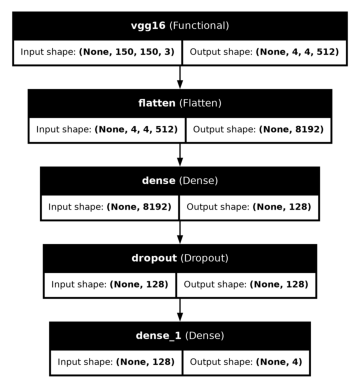

In [12]:
from tensorflow.keras.utils import plot_model
# Print the model summary
model.summary()  # Print summary of the model architecture

# Plot model architecture and save the plot
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
# Load the image to display
img = cv2.imread('model_architecture.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


In [13]:
# Print the final epoch's training and validation accuracy and loss
final_training_acc = history.history['accuracy'][-1]
final_training_loss = history.history['loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"\nFinal Training Accuracy: {final_training_acc:.4f}")
print(f"Final Training Loss: {final_training_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")


Final Training Accuracy: 0.9975
Final Training Loss: 0.0254
Final Validation Accuracy: 1.0000
Final Validation Loss: 0.0101


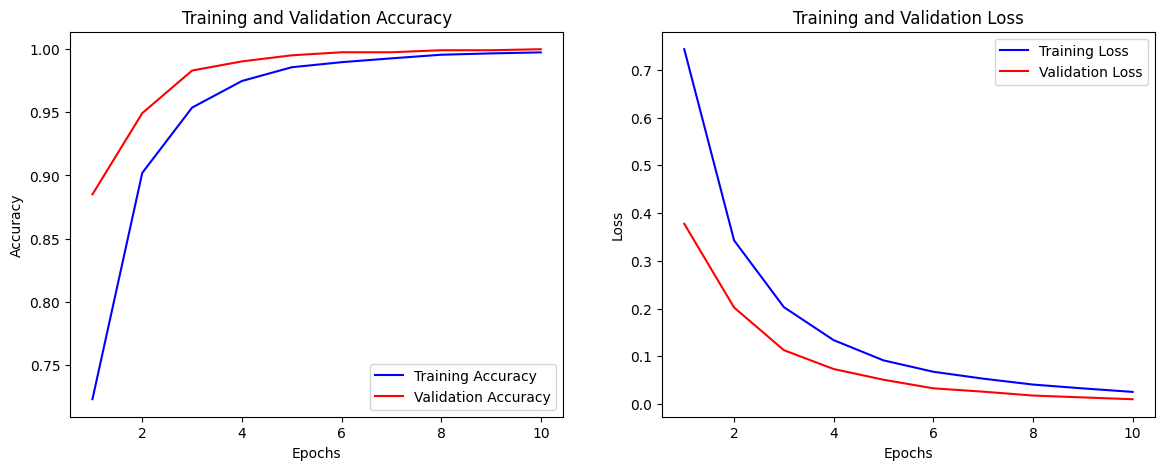

In [14]:
# Plotting the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'b', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'b', label='Training Loss')
plt.plot(epochs_range, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [15]:
# Predict labels for validation set
y_pred = []
y_true = []
for images, labels in val_ds:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━

In [16]:
# Classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))


Classification Report:
               precision    recall  f1-score   support

        Cyst       1.00      1.00      1.00       385
      Normal       1.00      1.00      1.00       500
       Stone       1.00      1.00      1.00       121
       Tumor       1.00      1.00      1.00       238

    accuracy                           1.00      1244
   macro avg       1.00      1.00      1.00      1244
weighted avg       1.00      1.00      1.00      1244



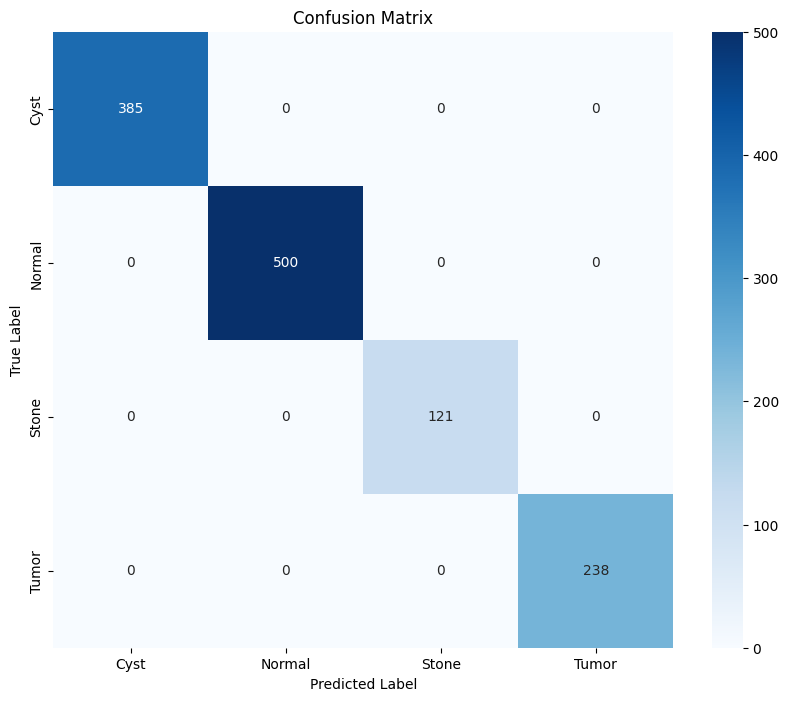

In [17]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [18]:
# Function to make predictions on an image
def predict_img(img):
    plt.imshow(img)
    plt.show()
    resize = tf.image.resize(img, (img_height, img_width))
    yhat = model.predict(np.expand_dims(resize / 255.0, 0))
    max_index = np.argmax(yhat)
    label = label_to_class_name[max_index]
    return label

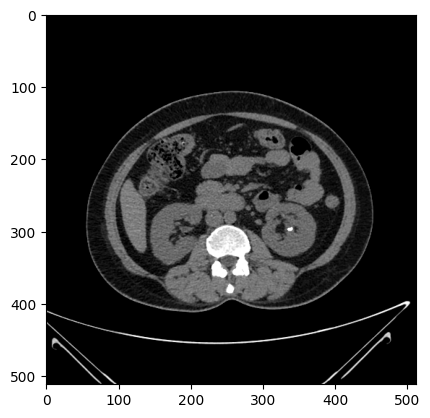

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step
Predicted label: Stone


In [19]:
# Load a sample image for prediction
img = cv2.imread('/kaggle/input/stone-img/s.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
predicted_label = predict_img(img_rgb)
print(f"Predicted label: {predicted_label}")

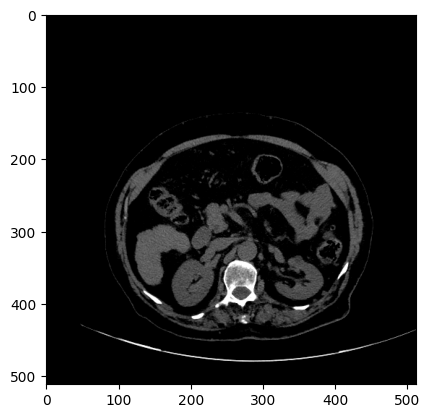

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted label: Cyst


In [20]:
# Load a sample image for prediction
img = cv2.imread('/kaggle/input/cyst-img/c.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
predicted_label = predict_img(img_rgb)
print(f"Predicted label: {predicted_label}")

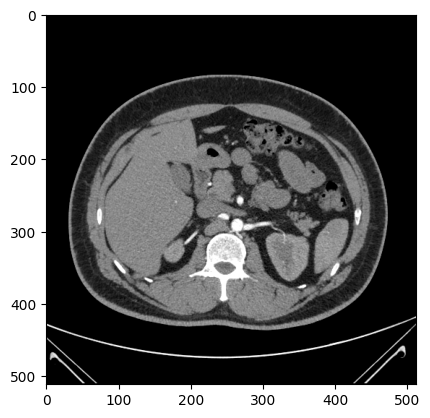

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted label: Normal


In [21]:
# Load a sample image for prediction
img = cv2.imread('/kaggle/input/normal-img/n.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
predicted_label = predict_img(img_rgb)
print(f"Predicted label: {predicted_label}")

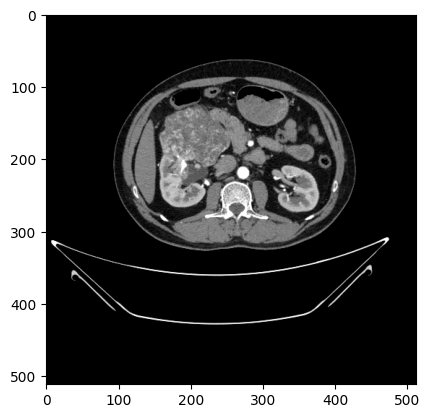

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted label: Tumor


In [22]:
# Load a sample image for prediction
img = cv2.imread('/kaggle/input/tumor-img/t.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
predicted_label = predict_img(img_rgb)
print(f"Predicted label: {predicted_label}")